# Assignment 1. Data Acquisition and Pandas Basics

### Due: April 2nd (Tuesday) 11:59 pm

## Introduction

In this assignment, we ask you to write python code to solve three data acquisition problems. You will learn how to load CSV files, create functions in python, create plots and summary statistics, and scrape web page. 

### Data

You will use three datasets.
1. NOAA Hanover Climate Data: https://www.ncdc.noaa.gov/cdo-web/
2. S&P 500, Dow Jones Industrial Average, Nasdaq Composite
3. Lending Club Loan Data from Kaggle (https://www.kaggle.com/wendykan/lending-club-loan-data)

### Useful libraries

- pandas
- matplotlib
- numpy
- [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)


## Problem 1: Hanover Climate Data Basic Analysis

You need to implement functions to load the provided Hanover Climate Data CSV file in python, print out data summaries, and plot the data. 

### Q1: Load the CSV file (5 points)

The data file is NOAA_Hanover.csv. write a function to load the file to pandas dataframe and return the dataframe.

Note:
- The data type of the "DATE" column should be datetime or Timestamp.
- Rows should be sorted by "DATE".

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def load_hanover_climate_data(filename='NOAA_Hanover.csv', low_memory=False):
    # write your code here
    df = pd.read_csv(filename)
    df = pd.DataFrame(df)
    #df['DATE'] = pd.to_datetime(df['DATE'],format='%Y-%m-%d')
    return df

### Q2: Show the data (15 points)

Write python code in the following cell to:
- Print out all column names.
- Show the first 10 rows of the dataframe.
- Show the date range of the data.
- Print out the percentage of missing values for columns "TMIN", "TMAX", and "PRCP"?
- Find min, median, max, mean, and std of "TMIN", "TMAX", and "PRCP".

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
hanover_data = load_hanover_climate_data(filename='NOAA_Hanover.csv')
hanover_data['DATE'] = pd.to_datetime(hanover_data['DATE'])
# write your code here
print(hanover_data.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES',
       'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06',
       'WT06_ATTRIBUTES', 'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES',
       'WT09', 'WT09_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES', 'WT14',
       'WT14_ATTRIBUTES', 'WT16', 'WT16_ATTRIBUTES', 'WT18',
       'WT18_ATTRIBUTES'],
      dtype='object')


In [5]:
print(hanover_data.head(10))

       STATION              NAME  LATITUDE  LONGITUDE  ELEVATION       DATE  \
0  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-01   
1  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-02   
2  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-03   
3  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-04   
4  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-05   
5  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-06   
6  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-07   
7  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-08   
8  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-09   
9  USC00273855  HANOVER 2, NH US   43.7186   -72.2724      161.5 2011-01-10   

   PRCP PRCP_ATTRIBUTES  SNOW SNOW_ATTRIBUTES       ...        WT09  \
0   0.0        ,,7,0700   0.0             ,,7       ...    

In [6]:
print("The date range of the data is from {0} to {1}".format(min(hanover_data['DATE']),max(hanover_data['DATE'])))

The date range of the data is from 1884-11-01 00:00:00 to 2018-02-28 00:00:00


In [7]:
print("The percentage of missing values for TMIN is {0}%".
      format(round((hanover_data['TMIN'].isnull().sum()/len(hanover_data['TMIN']))*100,2)))
print("The percentage of missing values for TMAX is {0}%".
      format(round((hanover_data['TMAX'].isnull().sum()/len(hanover_data['TMIN']))*100,2)))
print("The percentage of missing values for PRCP is {0}%".
      format(round((hanover_data['PRCP'].isnull().sum()/len(hanover_data['TMIN']))*100,2)))

The percentage of missing values for TMIN is 7.67%
The percentage of missing values for TMAX is 7.82%
The percentage of missing values for PRCP is 5.18%


In [8]:
print("TMIN: min = {0}, median = {1}, max = {2}, mean = {3}, std = {4}".format(hanover_data['TMIN'].min(),hanover_data['TMIN'].median(),hanover_data['TMIN'].max(),hanover_data['TMIN'].max(),round(hanover_data['TMIN'].std(),2)))
print("TMAX: min = {0}, median = {1}, max = {2}, mean = {3}, std = {4}".format(hanover_data['TMAX'].min(),hanover_data['TMAX'].median(),hanover_data['TMAX'].max(),hanover_data['TMAX'].max(),round(hanover_data['TMAX'].std(),2)))
print("PRCP: min = {0}, median = {1}, max = {2}, mean = {3}, std = {4}".format(hanover_data['PRCP'].min(),hanover_data['PRCP'].median(),hanover_data['PRCP'].max(),hanover_data['PRCP'].max(),round(hanover_data['PRCP'].std(),2)))

TMIN: min = -40.0, median = 1.7, max = 25.0, mean = 25.0, std = 10.99
TMAX: min = -24.4, median = 13.9, max = 39.4, mean = 39.4, std = 11.76
PRCP: min = 0.0, median = 0.0, max = 143.5, mean = 143.5, std = 6.76


### Q3: Visualize the data (15 points)

Write a function to show a line plot of a given year's temperature and preciptation. The function should take three parameters: dataframe, year, and column name you are going to plot. Show months on the x-axis.

Hint: use pandas.Timestamp to represent date.

- Pick a year, plot TMIN, TMAX in one plot, and PRCP in another plot.
- Make a plot to show the differences between TMAX and TMIN (i.e., TMAX-TMIN). Hint: you can modify the dataframe.

<Figure size 432x288 with 0 Axes>

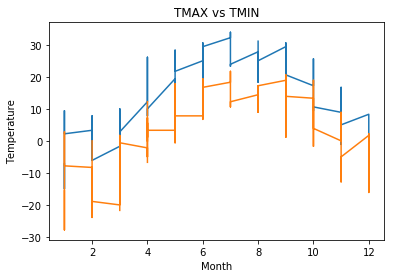

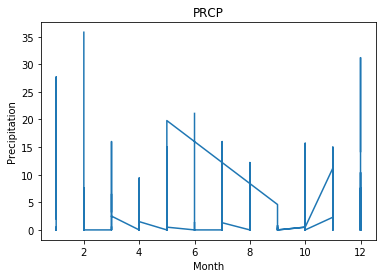

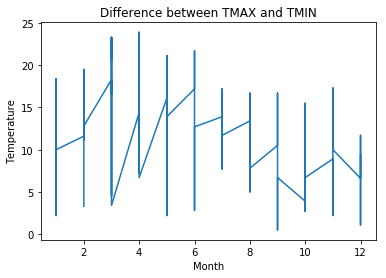

<Figure size 432x288 with 0 Axes>

In [9]:
from pandas import Timestamp
import numpy as np
from datetime import datetime

def plot_weather_data(weather_data, year, column, y_label=''):
    # write your code here
    year_input = weather_data[weather_data['DATE'].dt.year == year]
    plt.plot(year_input['DATE'].dt.month,year_input[column])
    pass

# write your code here
plot_weather_data(hanover_data,2014,'TMAX')
plot_weather_data(hanover_data,2014,'TMIN')
plt.title('TMAX vs TMIN')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.figure()

plot_weather_data(hanover_data,2014,'PRCP')
plt.title('PRCP')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.figure()

hanover_data['Diff'] = hanover_data['TMAX'] - hanover_data['TMIN']
plot_weather_data(hanover_data,2014,'Diff')
plt.title('Difference between TMAX and TMIN')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.figure()

## Problem 2: DJIA, S&P 500, and NASDAQ Correlation Analysis

Before you start working on this problem, install pandas-datareader python library.

You will implement code to download DJIA, S&P 500, and NASDAQ from FRED (Federal Reserve Economic Data) and visualize the data from 2016-03-27 to 2019-03-27.

### Q1: Download the data (10 points)

Read pandas-datareader document at https://pydata.github.io/pandas-datareader/stable/remote_data.html#remote-data-fred to figure out how to use the API to download the data. Write your code to download the data.

In [10]:
# write your code here to load DJIA, SP500, NASDAQCOM from fred, show the head
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016,3,27)
end = datetime.datetime(2019,3,27)

stock = web.DataReader(['DJIA','SP500','NASDAQCOM'],'fred',start,end)
stock.head()

,DJIA,SP500,NASDAQCOM
DATE,,,
2016-03-28,17535.39,2037.05,4766.79
2016-03-29,17633.11,2055.01,4846.62
2016-03-30,17716.66,2063.95,4869.29
2016-03-31,17685.09,2059.74,4869.85
2016-04-01,17792.75,2072.78,4914.54


### Q2: Plot the data (5 points)

Make three line plots to show how Dow Jones Industrial Average, S&P 500, and NASDAQ change over time.

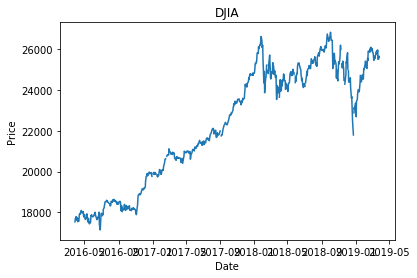

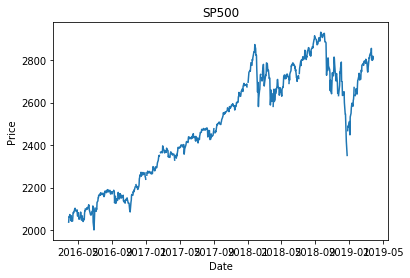

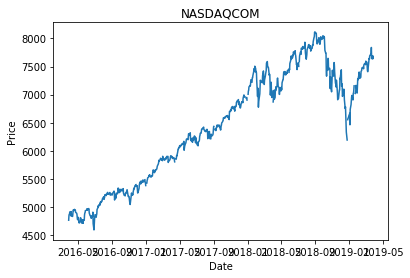

<Figure size 432x288 with 0 Axes>

In [11]:
# write your code here
# plot 3 figs
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(stock['DJIA'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('DJIA')
plt.figure()

plt.plot(stock['SP500'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SP500')
plt.figure()

plt.plot(stock['NASDAQCOM'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NASDAQCOM')
plt.figure()
plt.show()

### Q3: Correlation (10 points)

The three composite indices look similar. Compute correlations to quantify how similar they are. 

**Hint**: Try to skip `NaN` values in the columns.

In [12]:
stock.isnull().sum() # see how many missing values there are in each column

DJIA         29
SP500        27
NASDAQCOM    27
dtype: int64

In [13]:
# your code starts here
stock = stock.dropna() #use dropna() function to remove the missing values
stock.isnull().sum() # check if there are missing values, should have zero now

DJIA         0
SP500        0
NASDAQCOM    0
dtype: int64

In [14]:
stock.corr() # get the correlations

,DJIA,SP500,NASDAQCOM
DJIA,1.000000,0.993250,0.983924
SP500,0.993250,1.000000,0.994197
NASDAQCOM,0.983924,0.994197,1.000000


## Problem 3: Lending Club Loan Aggregation Analysis

The dataset for this problem is from Kaggle (https://www.kaggle.com/wendykan/lending-club-loan-data). It's a large and high-dimentional dataset. We simplified the dataset for beginner use and we may extend to its full version in later assignments. 

### Q1: Unzip and Load Data (5 points)

Please use python code unzip it to `"./dataset/"` folder and load the data into dataframe. Your jupyter notebook should be in the same folder with `dataset`.

In [15]:
import os
import pandas as pd
import zipfile

dataset_path = './dataset/'
zip_file_name = 'loan.csv.zip'
csv_file_name = 'loan.csv'

# write your code here
zf = zipfile.ZipFile(zip_file_name)
zf.extractall(dataset_path)

loan_data = pd.read_csv(zf.open(csv_file_name))
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q2: Indexing (10 points)

There are about 70+ columns and about 870000 rows in the dataset. However, not all of them are of our interests. Also, some values in certain columns are missing or hard to proceed.
We need select some of rows and columns as a subset for further mining.

First, extract columns whose names are `'loan_amnt'`, `'term'`, `'int_rate'`, `'grade'`, `'issue_d'`, `'addr_state'`, `'loan_status'`. Show your subset data head.

Second, have a look at `'loan_status'` column. There are several possible status appearing in this metric and please count the number of records for each possible status. Print out your result.

In [16]:
# write your code here
loan_subset = loan_data[['loan_amnt','term','int_rate','grade','issue_d','addr_state','loan_status']]
loan_subset.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current


In [17]:
loan_subset['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Q3: Data Aggregation with Group Operations (25 points)

Your next step is about how to group data in terms of certain criteria. Here, we would like to know the amount of loan by month. In other words, we'd like to see something like:

|   issue_m  |    loan_amnt    |
| ---------- | -----------|
|     2007-06   |   91850.0  |
|     2007-07   |  348325.0  |

Sometimes the value in time-related columns cannot be handled by pandas. For example if you have a look at the value in `'issue_d'` column, its form is like "Dec-12".
We human can understand it but pandas needs `datetime` variable to proceed.

Please perform suitable data processing on the subset. Then group the records according to month. Sum all the loans in each month and **print out top ten lines of the result**.

**Hint**: `groupby`

In [18]:
# write your code here
loan_subset['issue_d'] = pd.to_datetime(loan_subset['issue_d'])
month = loan_subset['issue_d'].dt.month
loan_subset['month'] = month
loan_subset.groupby(['month'])[['loan_amnt']].sum()

,loan_amnt
month,
1,9.327494e+08
2,7.809604e+08
3,8.353893e+08
4,1.035324e+09
5,9.909867e+08
6,9.304178e+08
7,1.398710e+09
8,1.127646e+09
9,9.185180e+08
